# <font color='red'>BackPropagation</font>

**There will be some functions that start with the word "grader" ex: grader_sigmoid(), grader_forwardprop(), grader_backprop() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

## <font color='red'>Loading data </font>

In [61]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

# <font color='red'>Task 1: Implementing backpropagation and Gradient checking </font>

<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

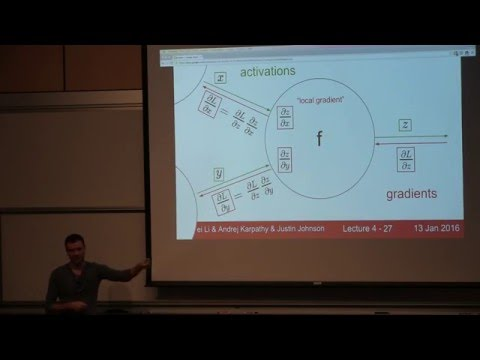

In [62]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")


*  <b>Write two functions<br>
    *  Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

    <pre>
    <font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, <br>         ..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig,dl variables
        </font>
        return (dictionary, which you might need to use for back propagation)
        <font color='grey'>
        </font>
</font>
</pre>
    *  <b>Backward propagation</b>(Write your code in<font color='blue'> def backward_propagation()</b></font>)
    </b>
    <pre>
    <font color='green'>
    def backward_propagation(L, W,dictionary):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # dictionary: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        # Hint: you can use dict type to store the required variables 
        # return dW, dW is a dictionary with gradients of all the weights
        </font>
        return dW
        </font>
</font>
</pre>

 ## <font color='red'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* Initilze the 9 weights from normal distribution with mean=0 and std=0.01

**Check below video and <a href='https://cs231n.github.io/neural-networks-3/'>this</a> blog**

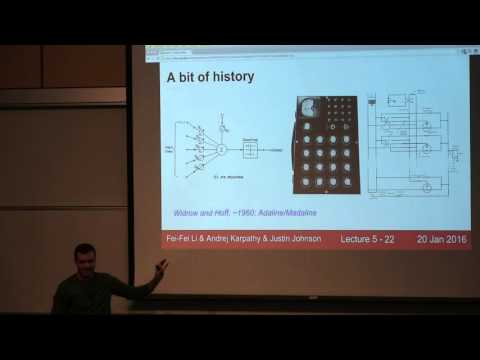

In [63]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights


**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

<br>
<br>
<br>

# <font color='red'>Task 1 </font>

## <font color='blue'>Forward propagation </font>

In [64]:
import numpy as np
import math

In [65]:
X[0], y[0]

(array([-1.2879095 , -0.12001342, -1.45900038, -0.66660821, -0.14421743]),
 1.858849127371369)

In [66]:

def sigmoid(z):
    import numpy as np
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation

    return 1/(1+np.exp(-z))
    
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        X = x
        # y: output varible
        y=y
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        W = w
        # you have to return the following variables
        
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        expo = np.exp( (  ((W[0]*X[0])+(W[1]*X[1])) * ((W[0]*X[0])+(W[1]*X[1]))  ) + W[5] )
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        tanh_t = math.tanh(expo + W[6])
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        prev_sig = W[7] + ( np.sin(W[2]*X[2]) * ( (W[3]*X[3])+(W[4]*X[4]) ) )
        sigmoid = 1/(1+np.exp(-prev_sig))
        # now compute remaining values from computional graph and get y'
        
        y_hat = tanh_t + (W[8]*sigmoid)
        # write code to compute the value of L=(y-y')^2
        L = (y-y_hat)**2
        # compute derivative of L  w.r.to Y' and store it in dl
        dl = -2*(y-y_hat)
        # Create a dictionary to store all the intermediate values
        temp_dict={}
        # store L, exp,tanh,sig variables
        temp_dict['dy_pr']=dl
        temp_dict['loss']=L
        temp_dict['exp']=expo
        temp_dict['tanh']=tanh_t
        temp_dict['sigmoid']=sigmoid
        return temp_dict#(dictionary, which you might need to use for back propagation)

<font color='cyan'>Grader function - 1</font>

In [67]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='cyan'>Grader function - 2 </font>

In [68]:
def grader_forwardprop(data):
    dl = (data['dy_pr']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [69]:
def backward_propagation(L,W,d1):
    '''In this function, we will compute the backward propagation '''
    # L: the loss we calculated for the current point
    # dictionary: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables  
    k = d1['dy_pr']
    dW = dict() # temporary dictionary to store derivatives with respect to each weight
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    dw1 = k*(1-d1['tanh']**2)*d1['exp']*((2*(W[0]*L[0]+W[1]*L[1]))*L[0])
    dW['dw1']=dw1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    dw2 = k*(1-d1['tanh']**2)*d1['exp']*((2*(W[0]*L[0]+W[1]*L[1]))*L[1])
    dW['dw2']=dw2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    dw3 = k*W[8]*(d1['sigmoid']*(1-d1['sigmoid']))*(L[4]*W[4]+L[3]*W[3])*np.cos(W[2]*L[2])*L[2]
    dW['dw3']=dw3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    dw4 = k*W[8]*(d1['sigmoid']*(1-d1['sigmoid']))*np.sin(W[2]*L[2])*L[3]
    dW['dw4']=dw4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    dw5 = k*W[8]*(d1['sigmoid']*(1-d1['sigmoid']))*np.sin(W[2]*L[2])*L[4]
    dW['dw5']=dw5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    dw6 = k*(1-d1['tanh']**2)*d1['exp']
    dW['dw6']=dw6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    dw7 = k*(1-d1['tanh']**2)
    dW['dw7']=dw7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    dw8 = k*W[8]*(d1['sigmoid']*(1-d1['sigmoid']))
    dW['dw8']=dw8
    # dw9 = # in dw9 compute derivative of L w.r.to w9
    dw9 = k*d1['sigmoid']
    dW['dw9']=dw9
    
    # return dW, dW is a dictionary with gradients of all the weights
    return dW

<font color='cyan'>Grader function - 3 </font>

In [70]:
def grader_backprop(data):
    dw1=(data['dw1']==-0.22973323498702003)
    dw2=(data['dw2']==-0.021407614717752925)
    dw3=(data['dw3']==-0.005625405580266319)
    dw4=(data['dw4']==-0.004657941222712423)
    dw5=(data['dw5']==-0.0010077228498574246)
    dw6=(data['dw6']==-0.6334751873437471)
    dw7=(data['dw7']==-0.561941842854033)
    dw8=(data['dw8']==-0.04806288407316516)
    dw9=(data['dw9']==-1.0181044360187037)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],w,d1)
grader_backprop(d1)

True

## <font color='blue'> Implement gradient checking</font>

In [117]:
W = np.random.random(9)

def gradient_checking(X, y, W):
    # compute the L value using forward_propagation()
    dictionary = forward_propagation(X, y, W)
    L = dictionary['loss']
    # compute the gradients of W using backword_propagation()
    bp_gradient_dict = backward_propagation(X, W, dictionary)
    dws = list(bp_gradient_dict.values())
    
    approx_gradients = []
    W_new = W.copy()
    epsilon = 1e-7
    gc = [] # gradient checks 
    for i in range(len(W)):
        
        # add a small value to weight wi, and then find the values of L with the updated weights
        W_new[i] = W[i]+epsilon
        lplus = forward_propagation(X, y, W_new)['loss']
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        W_new[i] = W[i]-epsilon
        lminus= forward_propagation(X, y, W_new)['loss']
        # compute the approximation gradients of weight wi
        dwapprox = (lplus - lminus)/(2*epsilon)
        approx_gradients.append(dwapprox)
        
        # Doing gradient checking for each weight.
        gc.append((dws[i]-dwapprox)/(dws[i]+dwapprox))
        
        print(gc[i])
        if gc[i] < 1e-7 :
            print(True)
        else:
            print(False)

   
    dict_new = forward_propagation(X,y,W_new)
    L_new = dict_new['loss']
#     bp_grad_dict_new = backward_propagation(X,W_new,dict_new)
#     # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with gradient_check formula
#     dw = np.linalg.norm(np.array(list(bp_gradient_dict.values())))
#     dw_approx = np.linalg.norm(np.array(list(bp_grad_dict_new.values())))
#     gradient_check = np.linalg.norm(dw-dw_approx)/(np.linalg.norm(dw)+np.linalg.norm(dw_approx))
#     print(bp_grad_dict_new)
#     print(dw, dw_approx, np.linalg.norm(dw-dw_approx))
    gradient_check = (L - L_new)/(L + L_new)
    return gradient_check

In [118]:
gradient_checking(X[0],y[0],W)

-2.1964339278883197e-10
True
3.0207342514638316e-08
True
1.9088329700268177e-09
True
5.5703897793530506e-08
True
4.244798144300706e-08
True
-1.345061111858535e-07
True
-3.3288925448858926e-07
True
-2.5059720925001057e-08
True
1.0059165889693875e-08
True


-1.2767638662837455e-07

# <font color='red'>Task 2: Optimizers

###<font color='blue'>Algorithm with Vanilla update of weights</font>

In [12]:
from tqdm import tqdm

In [86]:
np.random.seed(42)
epochs= list(range(10))
lossv = []
W = np.random.random_sample(size=9)
learning_rate = 0.001
for e in tqdm(epochs):
    for i in range(len(X)):
        data = X[i]
        target = y[i]
        fwd_dict = forward_propagation(data,target,W)
        
        #dw is a dictionary with gradients of all the weights
        dw = backward_propagation(data,W,fwd_dict)
        
        dw = list(dw.values()) # after python 3.7, dictionary is ordered
        for j in range(len(W)):
            W[j] = W[j]-learning_rate*dw[j]
        # los -> loss 
        los = forward_propagation(data,target,W)['loss']
        
    lossv.append(los)

100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 20.15it/s]


In [87]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

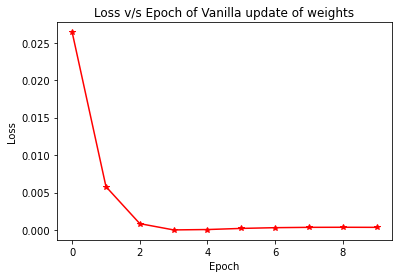

In [88]:
plt.plot(epochs, lossv, '-r*')
plt.title("Loss v/s Epoch of Vanilla update of weights")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [89]:
for i in zip(epochs, lossv):
    print(i)

(0, 0.02639157002887847)
(1, 0.005789644576213893)
(2, 0.0008567086309739778)
(3, 1.9800386063411796e-05)
(4, 7.062709018759135e-05)
(5, 0.00022012808215354568)
(6, 0.0003186154340391404)
(7, 0.0003628881003568347)
(8, 0.00037214579977479305)
(9, 0.0003620694204742259)


###<font color='blue'>Algorithm with Momentum update of weights</font>

In [91]:
np.random.seed(42)
epochs= list(range(10))
lossm = []
W = np.random.random_sample(size=9)
learning_rate = 0.001
beta=0.95
mt = np.zeros(9)
for e in tqdm(epochs):
    for i in range(len(X)):
        data = X[i]
        target = y[i]
        fwd_dict = forward_propagation(data,target,W)
        
        #dw is a dictionary with gradients of all the weights
        dw = backward_propagation(data,W,fwd_dict)
        dw = list(dw.values())
        
        for j in range(len(W)):
            mt[j] = beta*mt[j] + (1-beta)*dw[j]
            W[j] = W[j]-learning_rate*mt[j]
        
        # los -> loss 
        los = forward_propagation(data,target,W)['loss']
        
    lossm.append(los)

100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.31it/s]


In [92]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

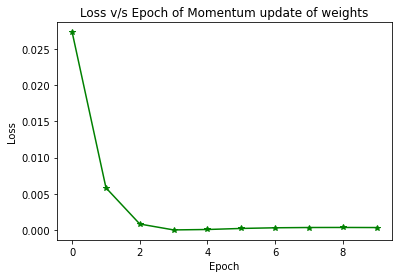

In [93]:
plt.plot(epochs, lossm, '-g*')
plt.title("Loss v/s Epoch of Momentum update of weights")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [94]:
for i in zip(epochs, lossm):
    print(i)

(0, 0.027317936214216774)
(1, 0.005825653768811177)
(2, 0.0008295184531718359)
(3, 1.6065058615676755e-05)
(4, 7.414209545987177e-05)
(5, 0.0002190830840715213)
(6, 0.00031064869230426867)
(7, 0.0003494315359397906)
(8, 0.00035525964773742985)
(9, 0.0003434118954090866)


###<font color='blue'>Algorithm with Adam update of weights</font>

In [98]:
np.random.seed(42)
epochs= list(range(10))
lossa = []
W = np.random.random_sample(size=9)
learning_rate = 0.001
beta1=0.90
beta2=0.99
mt = np.zeros(9)
vt = np.zeros(9)
epsilon = 0.001
for e in tqdm(epochs):
    for i in range(len(X)):
        data = X[i]
        target = y[i]
        fwd_dict = forward_propagation(data,target,W)
        
        #dw is a dictionary with gradients of all the weights
        dw = backward_propagation(data,W,fwd_dict)
        dw = list(dw.values())
        
        for j in range(len(W)):
            mt[j] = beta1*mt[j] + (1-beta1)*dw[j]
            vt[j] = beta2*vt[j] + (1-beta2)*(dw[j])**2
            m_hat = mt[j]/(1-beta1)
            v_hat = vt[j]/(1-beta2)
            pros = (learning_rate/(np.sqrt(v_hat))+epsilon)*m_hat
            W[j] = W[j]-pros
       
        
        # los -> loss 
        los = forward_propagation(data,target,W)['loss']
        
    lossa.append(los)

100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 13.28it/s]


In [99]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

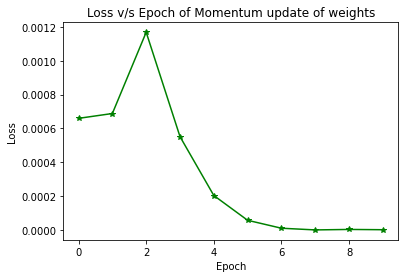

In [100]:
plt.plot(epochs, lossa, '-g*')
plt.title("Loss v/s Epoch of Momentum update of weights")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [101]:
for i in zip(epochs, lossa):
    print(i)

(0, 0.0006598828612854836)
(1, 0.0006884950417424874)
(2, 0.0011691380434527274)
(3, 0.0005518153823703698)
(4, 0.00020359004647651442)
(5, 5.694019387755264e-05)
(6, 1.0043322621157739e-05)
(7, 5.352800051860779e-08)
(8, 2.885480526250268e-06)
(9, 1.2462972111834953e-06)


<font color='blue'>Comparision plot between epochs and loss with different optimizers</font>

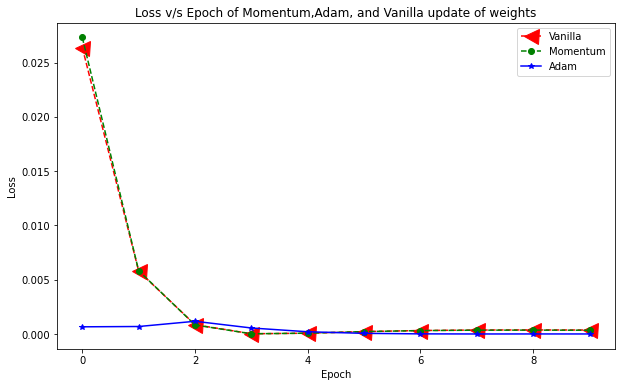

In [102]:
plt.figure(figsize=(10,6))
plt.plot(epochs, lossv, '--r<',markersize=15, label='Vanilla')
plt.plot(epochs, lossm, '--go', label='Momentum')
plt.plot(epochs, lossa, '-b*', label='Adam')

plt.title("Loss v/s Epoch of Momentum,Adam, and Vanilla update of weights")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

<p style="font-family:'Segoe UI';font-size:16px">
    <b>Conclusion:</b><br>
    <b>Vanilla:</b><br>
    1. In early few epochs, loss is falling very sharp.
    2. After few epochs, loss is not decreasing much.
    <br>
    <b>Momentum:</b><br>
    1. There is not much difference but little bit better than vanilla.
    <br>
    <b>Adam:</b><br>
    1. As we know Adam is one of better option among all, and we are observing the same here.
    2. In beginning 2 epochs loss is decreasing and then later loss keeps decreasing.
    <br><br>
    <b>Among all, Adam performed better.</b>
    </p>